# Data Analysis - Lab 6
### M. Sébastien MASCHA & M. Pierre SAUVAGE
### ISEP Paris   |   2019-2020
<br/>
<br/>

___

# Exercice A - Stationnarity analysis
*Overview of the concept of stationarity*

### Import of libraries

This document has been done using python on Jupyter Notebook with the librairies:

- maths for sqrt, pi, exp
- Numpy to manipulate arrays
- pandas to import csv
- matplotlib to plot graphics
- seaborn to make your charts prettier (built on top of Matplotlib)
- sklearn : tools for data mining and data analysis
- SciPy : a Python-based ecosystem of open-source software for mathematics, science, and engineering. 

In [1]:
# coding: utf-8

import data

from math import sqrt,pi,exp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

import sklearn
# Normalize data
from sklearn.preprocessing import StandardScaler
# Dimension reduction
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
# Useful 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans

import scipy
from scipy import stats

import statsmodels
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.stats.diagnostic import acorr_ljungbox

<br/>
<br/>

___
### Question 1 - Load the USeconomic dataset

In [2]:
df = pd.read_csv("data/USeconomics.csv", sep =',')

print("Dataset")
df.head()

Dataset


,ID,log.M1.,log.GNP.,rs,rl
0,1,6.111246,7.249073,0.010800,0.026133
1,2,6.115892,7.245084,0.008133,0.025233
2,3,6.129268,7.257003,0.008700,0.024900
3,4,6.141177,7.271565,0.010367,0.025667
4,5,6.151881,7.292746,0.012600,0.027467


### Question 2 - Create the variables that we are going to study

In [175]:
logGNP = df.loc[: , "log.GNP."]

In [176]:
year = np.linspace(1954, 1988, 136)
year = list(year)

In [177]:
GNP_list = logGNP.tolist()

Text(0, 0.5, 'Log GNP')

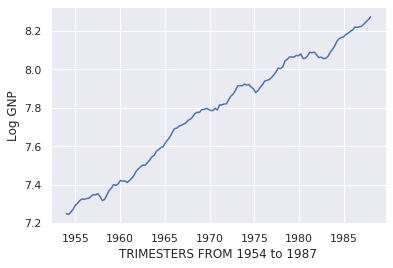

In [178]:
plt.plot(year, GNP_list) 
  
# naming the x axis 
plt.xlabel('TRIMESTERS FROM 1954 to 1987') 
# naming the y axis 
plt.ylabel('Log GNP') 

### Question 3 - What "stationnarity" means for a time series ?
Stationarity means that the statistical properties of a process generating a time series do not change over time. It does not mean that the series does not change over time, just that the way it changes does not itself change over time. The algebraic equivalent is thus a linear function, perhaps the value of a linear function changes as 𝒙 grows, but the way it changes remains constant.

##### Strict Stationarity
A time series is said to be strictly stationary if all its observations are drawn from the same distribution: the joint probability does not change in time.
##### Weak Stationarity
We do not require that each draw comes from the exact same distribution, only that the distributions have the same mean and variance (all of them not a
function of time). 

The log(GNP) function does not look to be stationary as it takes increasing values, its mean value and its variance are not constant.


### Question 4 - Display the correlograms of the logGNP time series

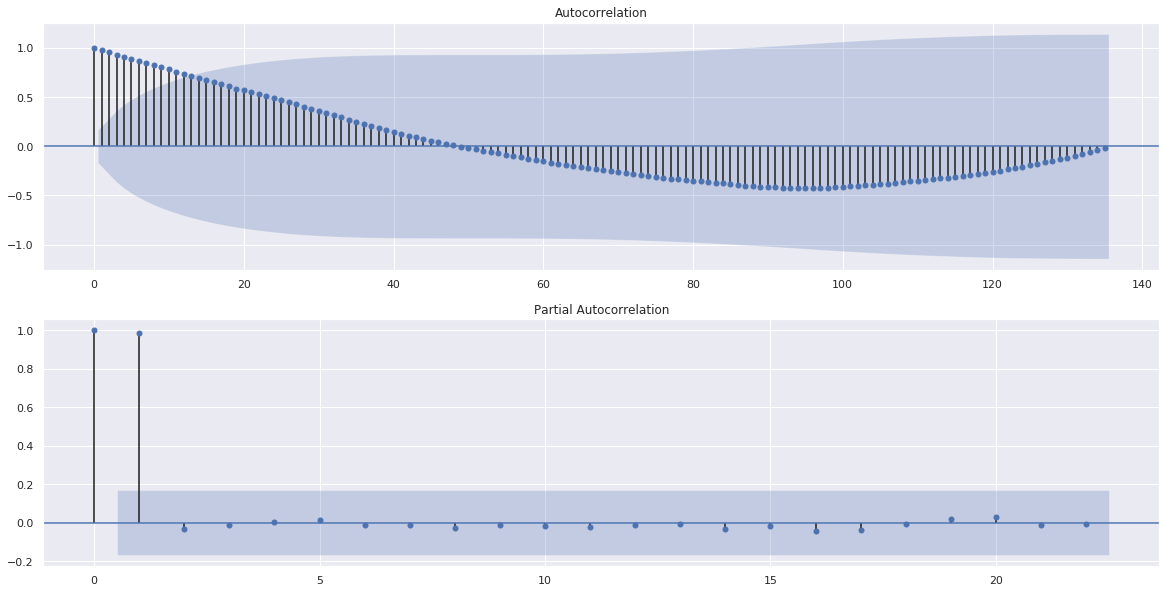

In [179]:
plt.figure(figsize=(20,10))
plt.subplot(211)
plot_acf(logGNP,ax=plt.gca(),lags=135)
plt.subplot(212)
plot_pacf(logGNP,ax=plt.gca())
plt.show()

In [180]:
acorr_ljungbox(logGNP, lags=None, boxpierce=True)

(array([ 132.86571499,  260.51546901,  383.05213314,  500.6827811 ,
         613.68454203,  722.15376124,  826.17838831,  925.753287  ,
        1020.96905653, 1111.90022305, 1198.58439528, 1281.12840469,
        1359.68053827, 1434.23198343, 1504.86173482, 1571.52149153,
        1634.21160414, 1693.10712068, 1748.49284085, 1800.70117328,
        1849.85650277, 1896.08364314, 1939.27276875, 1979.51275283,
        2016.82543602, 2051.10767653, 2082.40617453, 2110.67987972,
        2136.13442806, 2158.95346101, 2179.28236679, 2197.18101717,
        2212.83404676, 2226.37246851, 2237.95431091, 2247.67130765,
        2255.68103261, 2262.18716737, 2267.3770597 , 2271.45517228]),
 array([9.67388306e-031, 2.69020069e-057, 1.03749143e-082, 4.76847496e-107,
        2.23332939e-130, 1.00664910e-152, 4.15724608e-174, 1.57141269e-194,
        5.18397688e-214, 1.43547856e-232, 3.26956827e-250, 5.80138345e-267,
        7.44155178e-283, 6.92356357e-298, 0.00000000e+000, 0.00000000e+000,
        0.0000

#### Comment

https://stats.stackexchange.com/questions/200267/interpreting-ljung-box-test-results-from-statsmodels-stats-diagnostic-acorr-lju

First of all, just as the exemple we saw in class : the ACF does not go down exponentially
which means that the series may need to be differentiated. And so this is what we are going
to do in the following questions.

We use the Box-Pierce test in order to assess if the series is mostly white noise.
We observe that the p value for this test is very close to zero. Therefore we can reject the
null hypothesis and conclude that this series is not composed white noise. This implies that
this time series is not stationary.

According to the previous results we conclude that this time series is not stationary.

<br/>
<br/>

# Exercice B - Study of DiffGNP
___
### Question 1 - Create a DiffGNP

In [181]:
DiffGNP = logGNP.diff()
DiffGNP_list = DiffGNP.tolist()
DiffGNP = DiffGNP.drop([0])

This new time serie represents the difference of GDP between two quarters and t-1 for any t
between Q2 of 1954 and Q3 of 1987.

### Question 2 - Plot the evolution of this series between 1954 and the 3rd semester of 1987

Text(0, 0.5, 'DiffGNP')

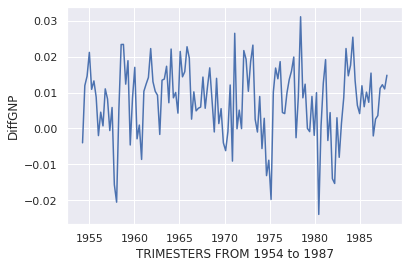

In [182]:
plt.plot(year, DiffGNP_list) 
  
# naming the x axis 
plt.xlabel('TRIMESTERS FROM 1954 to 1987') 
# naming the y axis 
plt.ylabel('DiffGNP') 

### Question 3 - Is this Series centered ?
In order to say if this series is centered or not we compute a Student Test that will also
provide us with the mean of the series.

In [183]:
vect_centered = np.linspace(0, 0, 136)
stats.ttest_ind(DiffGNP, vect_centered)

Ttest_indResult(statistic=8.706074014591564, pvalue=3.2338138725122526e-16)

The mean value of this time series is very close to zero. But the p value of the Student Test is
is almost zero, this means that we can reject the null hypothesis. Therefore the true mean
value is different from zero and the series is not centered.

### Question 4 - Use the plot_acf and plot_pacf

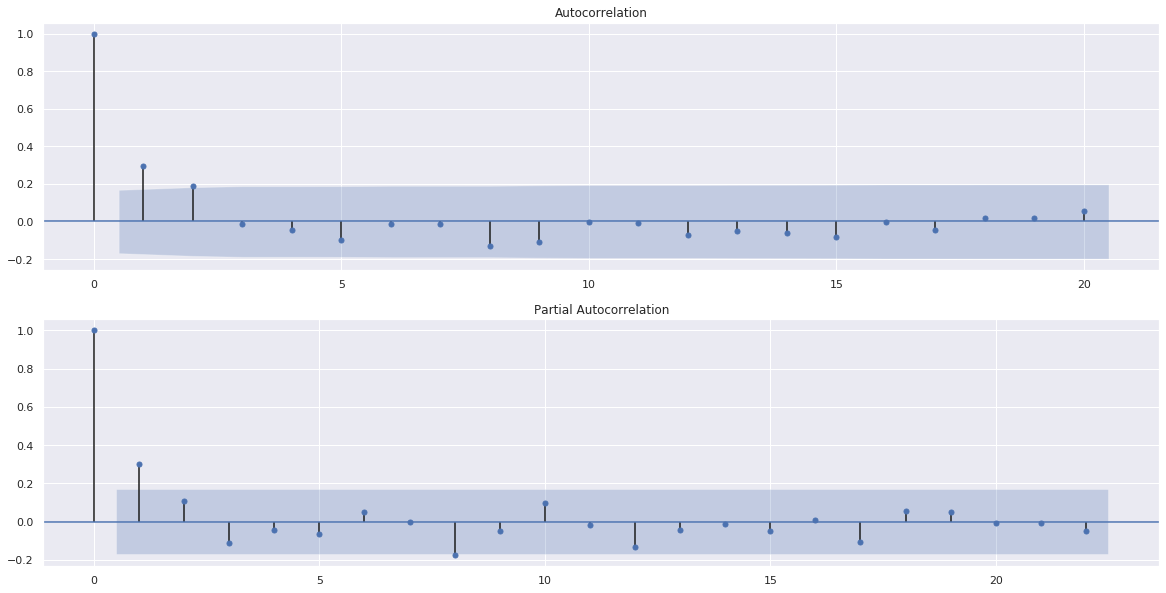

In [184]:
plt.figure(figsize=(20,10))
plt.subplot(211)
plot_acf(DiffGNP,ax=plt.gca(),lags=20)
plt.subplot(212)
plot_pacf(DiffGNP,ax=plt.gca())
plt.show()

#### Deduce the most likely parameter(s) p and q for an ARMA(p,q) model to modelise DiffGNP

From  ACF , we have 1 and 2
<br>
From  PACF, we have 1 and 8. 

### Question 5. Test all the couples (p,q) that seemed relevant to you

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<bound method ARMAResults.summary of <statsmodels.tsa.arima_model.ARMAResults object at 0x7fa29f265050>>


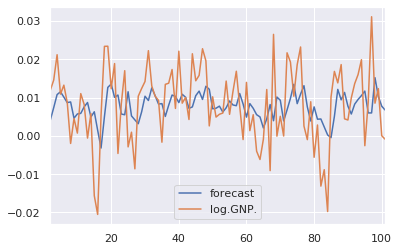

In [185]:
model = ARMA(DiffGNP, (2, 1))
model_fit = model.fit(disp = 0)
model_fit.plot_predict(1, 100)

print(model_fit.summary)

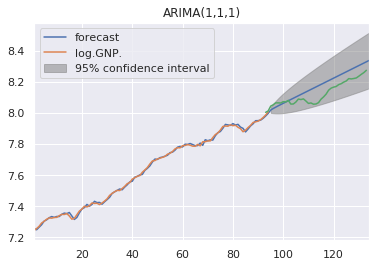

In [186]:
size = int(len(logGNP) * 0.7)
train= logGNP[0:size]
test = logGNP[size:len(logGNP)]

#ARMA(1,1)

model11 = ARIMA(train, order=(1,1,1))
model11 = model11.fit()

#ARMA(1,2)

model12 = ARIMA(train, order=(1,1,2))
model12 = model12.fit()

#ARMA(8,1)

model81 = ARIMA(train, order=(8,1,1))
model81 = model81.fit()

#ARMA(8,2)

model82 = ARIMA(train, order=(8,1,2))
model82 = model82.fit()

model11.summary()



model11.plot_predict(1,134)
plt.plot([i for i in range(93,134)],test, label='test')
plt.title('ARIMA(1,1,1)')
plt.show()

<br/>
<br/>

# Exercice C - ARIMA GNP
___


In [187]:
Diff2GNP = DiffGNP.diff()
Diff2GNP_list = Diff2GNP.tolist()
year.pop() 

1988.0

Text(0, 0.5, 'Diff2GNP')

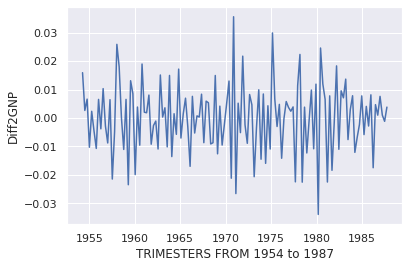

In [188]:
plt.plot(year, Diff2GNP_list) 
  
# naming the x axis 
plt.xlabel('TRIMESTERS FROM 1954 to 1987') 
# naming the y axis 
plt.ylabel('Diff2GNP') 

#### TEST SERIES CENTERED ?

In [189]:
Diff2GNP = Diff2GNP.drop([1])
vect_centered = np.linspace(0, 0, 135)
stats.ttest_ind(Diff2GNP, vect_centered)

Ttest_indResult(statistic=0.13531164494720013, pvalue=0.8924674316427184)

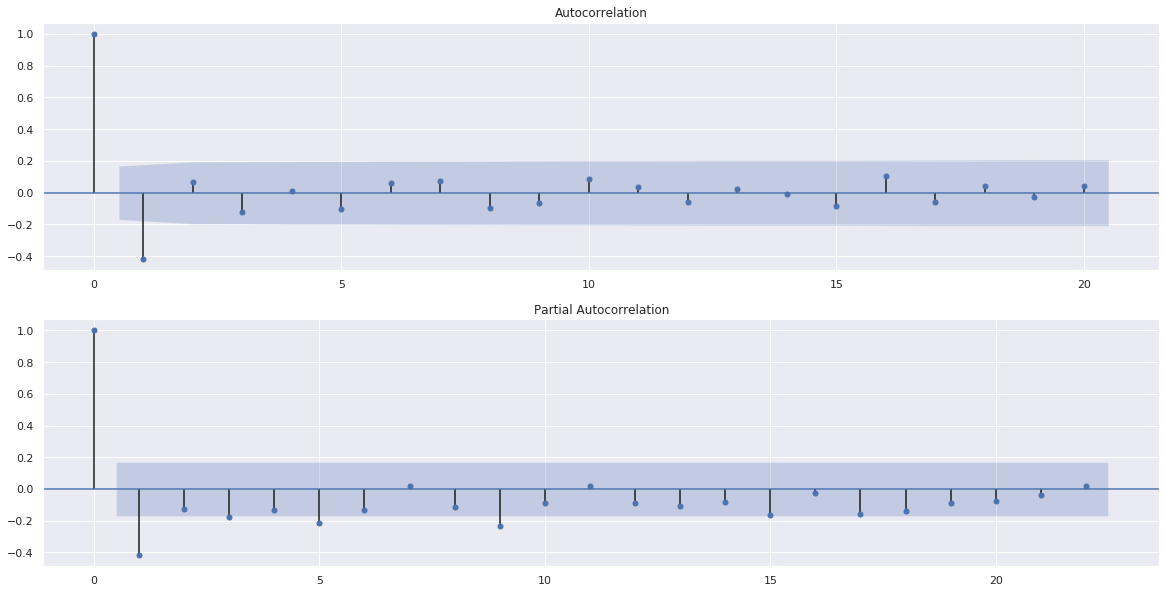

In [192]:
plt.figure(figsize=(20,10))
plt.subplot(211)
plot_acf(Diff2GNP,ax=plt.gca(),lags=20)
plt.subplot(212)
plot_pacf(Diff2GNP,ax=plt.gca())
plt.show()